In [1]:
import pandas as pd
import numpy as np

In [2]:
#verilerin yüklenmesi
veriler=pd.read_csv("/content/my_iris.csv")
veriler

FileNotFoundError: [Errno 2] No such file or directory: '/content/my_iris.csv'

In [123]:
#KORELASYON İLİŞKİLERİ
corr_matrix = veriler.corr()
def en_yuksek_iliskiler(corr_matrix):
    # Korelasyon matrisini sütunlara göre sıralama
    sorted_corr = corr_matrix.unstack().sort_values(ascending=False)

    # Sıralanmış korelasyon değerlerinin en yüksek olduğu sütun ikililerini yazdırma
    for i, (s1, s2) in enumerate(sorted_corr.index):
        if s1 != s2:  # Aynı sütun ikilisini tekrarlamamak için
            print(f"{s1}-{s2}: {sorted_corr[i]}")

# Örnek kullanım
en_yuksek_iliskiler(corr_matrix)


petal_length-petal_width: 0.9627570970509662
petal_width-petal_length: 0.9627570970509662
sepal_length-petal_length: 0.8717541573048716
petal_length-sepal_length: 0.8717541573048716
sepal_length-petal_width: 0.8179536333691642
petal_width-sepal_length: 0.8179536333691642
sepal_length-sepal_width: -0.10936924995064931
sepal_width-sepal_length: -0.10936924995064931
sepal_width-petal_width: -0.35654408961380507
petal_width-sepal_width: -0.35654408961380507
sepal_width-petal_length: -0.4205160964011539
petal_length-sepal_width: -0.4205160964011539


<ipython-input-123-b4fccfc7c866>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = veriler.corr()


In [105]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

def one_hot_encode(data, columns):
    # Kategorik sütunları seçme
    categorical_data = data[columns]

    # One-Hot Encoder oluşturma
    encoder = OneHotEncoder(sparse=False, drop='first')

    # Kategorik veriyi dönüştürme
    encoded_data = encoder.fit_transform(categorical_data)

    # One-Hot Encoding sonucunu DataFrame'e dönüştürme
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))

    # Dönüştürülmüş veriyi orijinal veriyle birleştirme
    preprocessed_data = pd.concat([data.drop(columns, axis=1), encoded_df], axis=1)

    return preprocessed_data




def min_max_scale(data, column):
    # Min-Max Scaler oluşturma
    scaler = MinMaxScaler()

    # Sütunu seçme ve ölçeklendirme
    scaled_column = scaler.fit_transform(data[[column]])

    # Ölçeklendirilmiş sütunu yeni bir DataFrame'e dönüştürme
    scaled_data = pd.DataFrame(scaled_column, columns=[column])

    # Ölçeklendirilmiş sütunu orijinal veri setine ekleme
    data[column] = scaled_data[column]

    return data


def fill_nan_with_mean(data):
    for column in data.columns:
        if data[column].isnull().any():
            mean = data[column].mean()
            data[column].fillna(mean, inplace=True)
    return data


def veriOnIsleme(data, columnsForOneHotEncoder, columnsForMinMaxScaler):
    dataForOneHot = one_hot_encode(data, columnsForOneHotEncoder)
    for column in columnsForMinMaxScaler:
        dataForOneHot = min_max_scale(dataForOneHot, column)  # Düzeltme: dataForOneHot kullanılmalı
    result = fill_nan_with_mean(dataForOneHot)
    return result

In [138]:
veriSetim=pd.read_csv("/content/my_iris.csv")
veriOnİslemeliSetDuzelt=veriOnIsleme(veriSetim, ["species"], ["sepal_length","sepal_width","petal_length","petal_width"])
#veriOnİslemeliSetDuzelt=veriOnİslemeliSetDuzelt.drop(["RowNumber","CustomerId","Surname", "Geography", "Gender"], axis=1)

MyX = veriOnİslemeliSetDuzelt.drop(columns="sepal_length",axis=1)
MyY = veriOnİslemeliSetDuzelt["sepal_length"]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [140]:
# "sütun_adı" sütununda kaç farklı eleman olduğunu bulun
farkli_eleman_sayisi = veriSetim["species"].nunique()

# Sonucu yazdırın
print("Sütunda", farkli_eleman_sayisi, "farklı eleman bulunmaktadır.")

Sütunda 3 farklı eleman bulunmaktadır.


In [125]:
MyX

,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,0.625000,0.067797,0.041667,0.0,0.0
1,0.416667,0.067797,0.041667,0.0,0.0
2,0.500000,0.050847,0.041667,0.0,0.0
3,0.458333,0.084746,0.041667,0.0,0.0
4,0.666667,0.067797,0.041667,0.0,0.0
...,...,...,...,...,...
145,0.416667,0.711864,0.916667,0.0,1.0
146,0.208333,0.677966,0.750000,0.0,1.0
147,0.416667,0.711864,0.791667,0.0,1.0
148,0.583333,0.745763,0.916667,0.0,1.0


In [126]:
MyY

0      0.222222
1      0.166667
2      0.111111
3      0.083333
4      0.194444
         ...   
145    0.666667
146    0.555556
147    0.611111
148    0.527778
149    0.444444
Name: sepal_length, Length: 150, dtype: float64

In [127]:
def parcalamaIslemi(A,B):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(A, B,test_size=0.2,random_state=42)
  return X_train, X_test, Y_train, Y_test

In [128]:
MyX_train, MyX_test, MyY_train, MyY_test=parcalamaIslemi(MyX, MyY)

In [129]:
MyX_train.shape,MyY_train.shape

((120, 5), (120,))

# **REGRESYONLAR**

Linear **Regression**

In [130]:
#Linear Regression+
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(MyX_train, MyY_train)
tahminCoklu = lin_reg.predict(MyX_test)

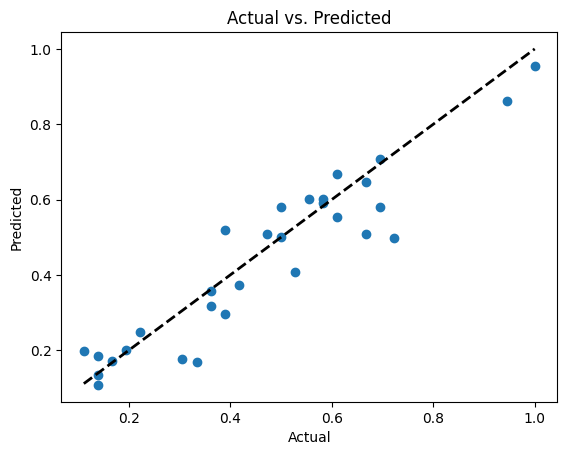

Mean Squared Error (MSE): 0.007117200563867445
Coefficient of Determination (R^2): 0.8663720504524018
Ortalama Mutlak Hata (MAE): 0.06327077885606754
Kök Ortalama Kare Hata (RMSE): 0.08436350255808163


In [157]:
#LINEAR REGRESSION METRİCS
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate metrics
mse = mean_squared_error(MyY_test, tahminCoklu)
r2 = r2_score(MyY_test, tahminCoklu)

# Plot the predicted values against the actual values
plt.scatter(MyY_test, tahminCoklu)
plt.plot([MyY_test.min(), MyY_test.max()], [MyY_test.min(), MyY_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, tahminCoklu)
print("Ortalama Mutlak Hata (MAE):", mae)

# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)



#plt.scatter(MyX_train.reshape(-1, 1), MyY_train)
#plt.plot(MyX_test.reshape(-1, 1),lin_reg.predict(MyX_test.reshape(-1, 1)))
#plt.show()


POlİNOMAL **REGRESSİON**

In [141]:
#POlİNOMAL REGRESSİON+
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(MyX_train)
lin2_reg=LinearRegression()
lin2_reg.fit(x_poly,MyY_train)
tahminPolynomial=lin2_reg.predict(x_poly)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Veri setini train ve test kümelerine ayırma
MyX_train, MyX_test, MyY_train, MyY_test = parcalamaIslemi(MyX.values, MyY.values.reshape(-1, 1))

# Polinom özelliklerini oluşturma
poly_reg = PolynomialFeatures(degree=2)
x_poly_train = poly_reg.fit_transform(MyX_train)
x_poly_test = poly_reg.transform(MyX_test)

# Polinom regresyon modelini oluşturma ve eğitme
lin2_reg = LinearRegression()
lin2_reg.fit(x_poly_train, MyY_train)

# Test veri kümesi üzerinde tahmin yapma
tahminPolynomial = lin2_reg.predict(x_poly_test)

# Hata metriklerini hesaplama
mse = mean_squared_error(MyY_test, tahminPolynomial)
r2 = r2_score(MyY_test, tahminPolynomial)
mae = mean_absolute_error(MyY_test, tahminPolynomial)



# Hata metriklerini yazdırma
rmse = np.sqrt(mse)
print("Ortalama Kare Hatası (MSE):", mse)
print("Determinasyon Katsayısı (R^2):", r2)
print("Ortalama Mutlak Hata (MAE):", mae)
print("Kök Ortalama Kare Hata (RMSE):", rmse)


Ortalama Kare Hatası (MSE): 0.010209419591610836
Determinasyon Katsayısı (R^2): 0.8083145481351027
Ortalama Mutlak Hata (MAE): 0.07971974721782792
Kök Ortalama Kare Hata (RMSE): 0.10104167254955174


Support Vektor **Regression**

In [145]:
#Support Vektor Regression+
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear')
svr_reg.fit(MyX_train, MyY_train)
tahminSVR=svr_reg.predict(MyX_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
#SUPPORT VECTOR REGRESSION METRİCS

from sklearn.metrics import mean_squared_error
mse_svr = mean_squared_error(MyY_test, tahminSVR)
r2_svr = r2_score(MyY_test, tahminSVR)


# Linear Regression metriklerini yazdırma
print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", mse_svr)
print("Coefficient of Determination (R^2):", r2_svr)
print("Mean Absolute Error (MAE):", mean_absolute_error(MyY_test, tahminSVR))
print("Root Mean Squared Error (RMSE):", np.sqrt(mse_svr))

Linear Regression Metrics:
Mean Squared Error (MSE): 0.0071922177791988355
Coefficient of Determination (R^2): 0.8649635757894288
Mean Absolute Error (MAE): 0.0629466738511651
Root Mean Squared Error (RMSE): 0.08480694416849859


Decision **Tree**

In [147]:
#Decision Tree+
from sklearn.tree import DecisionTreeRegressor
r_dt=DecisionTreeRegressor(random_state=(42))
r_dt.fit(MyX_train, MyY_train)
tahminDesicionTree=r_dt.predict(MyX_test)

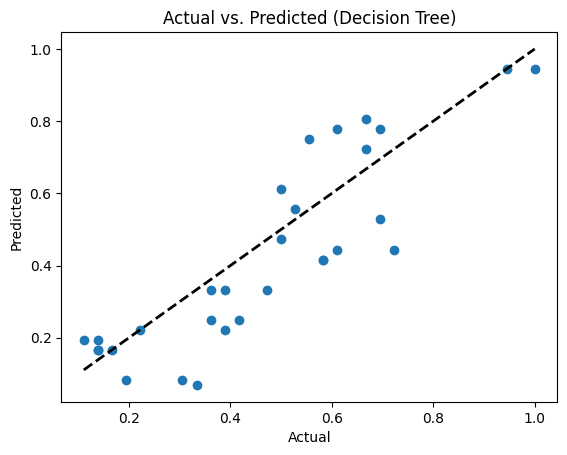

Decision Tree Metrics:
Mean Squared Error (MSE): 0.017804783950617287
Coefficient of Determination (R^2): 0.6657089047711029
Ortalama Mutlak Hata (MAE): 0.10879629629629631
Kök Ortalama Kare Hata (RMSE): 0.13343456804972723


In [156]:
# Decision Tree METRİCS


# Calculate metrics
mse_dt = mean_squared_error(MyY_test, tahminDesicionTree)
r2_dt = r2_score(MyY_test, tahminDesicionTree)

# Plot the predicted values against the actual values
plt.scatter(MyY_test, tahminDesicionTree)
plt.plot([MyY_test.min(), MyY_test.max()], [MyY_test.min(), MyY_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Decision Tree)')
plt.show()

# Print the metrics
print("Decision Tree Metrics:")
print("Mean Squared Error (MSE):", mse_dt)
print("Coefficient of Determination (R^2):", r2_dt)
print("Ortalama Mutlak Hata (MAE):", mean_absolute_error(MyY_test, tahminDesicionTree))
print("Kök Ortalama Kare Hata (RMSE):", np.sqrt(mse_dt))

Random **Forest**

In [153]:
#Random Forest+
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=20,random_state=(42))
rf_reg.fit(MyX_train, MyY_train)
tahminRandomForest=rf_reg.predict(MyX_test)

<ipython-input-153-3982f4dc1db1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(MyX_train, MyY_train)


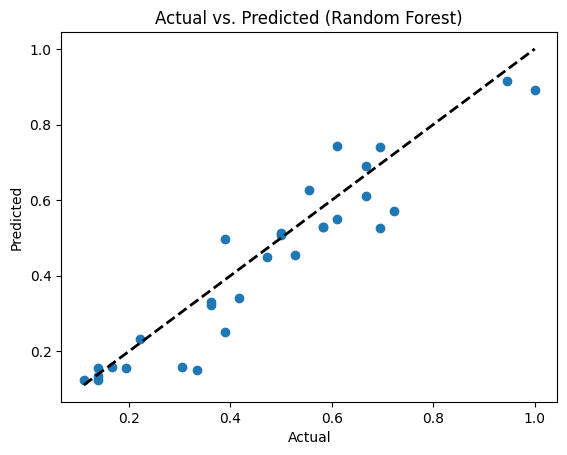

Mean Squared Error (MSE): 0.0068093198445358955
Coefficient of Determination (R^2): 0.8721526194921984
Mean Absolute Error (MAE): 0.06333950617283952
Root Mean Squared Error (RMSE): 0.08251860302099094


In [155]:
#RANDOM FOREST METRİCS

# Calculate metrics
mse_rf = mean_squared_error(MyY_test, tahminRandomForest)
r2_rf = r2_score(MyY_test, tahminRandomForest)

# Plot the predicted values against the actual values
plt.scatter(MyY_test, tahminRandomForest)
plt.plot([MyY_test.min(), MyY_test.max()], [MyY_test.min(), MyY_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Random Forest)')
plt.show()

# Print the metrics
print("Mean Squared Error (MSE):", mse_rf)
print("Coefficient of Determination (R^2):", r2_rf)

# MAE
mae_rf = mean_absolute_error(MyY_test, tahminRandomForest)
print("Mean Absolute Error (MAE):", mae_rf)

# RMSE
rmse_rf = np.sqrt(mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)


**TABLOLAR**

In [158]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tabulate import tabulate

# Initialize an empty list to store the results
results = []

# Linear Regression
mse_lr = mean_squared_error(MyY_test, tahminCoklu)
r2_lr = r2_score(MyY_test, tahminCoklu)
mae_lr = mean_absolute_error(MyY_test, tahminCoklu)
rmse_lr = np.sqrt(mse_lr)
results.append(["Linear Regression", mse_lr, r2_lr, mae_lr, rmse_lr])

# Polynomial Regression
mse_pr = mean_squared_error(MyY_test, tahminPolynomial)
r2_pr = r2_score(MyY_test, tahminPolynomial)
mae_pr = mean_absolute_error(MyY_test, tahminPolynomial)
rmse_pr = np.sqrt(mse_pr)
results.append(["Polynomial Regression", mse_pr, r2_pr, mae_pr, rmse_pr])

# Support Vector Regression
mse_svr = mean_squared_error(MyY_test, tahminSVR)
r2_svr = r2_score(MyY_test, tahminSVR)
mae_svr = mean_absolute_error(MyY_test, tahminSVR)
rmse_svr = np.sqrt(mse_svr)
results.append(["Support Vector Regression", mse_svr, r2_svr, mae_svr, rmse_svr])

# Decision Tree Regression
mse_dt = mean_squared_error(MyY_test, tahminDesicionTree)
r2_dt = r2_score(MyY_test, tahminDesicionTree)
mae_dt = mean_absolute_error(MyY_test, tahminDesicionTree)
rmse_dt = np.sqrt(mse_dt)
results.append(["Decision Tree Regression", mse_dt, r2_dt, mae_dt, rmse_dt])

# Random Forest Regression
mse_rf = mean_squared_error(MyY_test, tahminRandomForest)
r2_rf = r2_score(MyY_test, tahminRandomForest)
mae_rf = mean_absolute_error(MyY_test, tahminRandomForest)
rmse_rf = np.sqrt(mse_rf)
results.append(["Random Forest Regression", mse_rf, r2_rf, mae_rf, rmse_rf])

# Define headers for the table
headers = ["Model", "MSE", "R^2", "MAE", "RMSE"]

# Print the results as a table
print(tabulate(results, headers=headers))


Model                             MSE       R^2        MAE       RMSE
-------------------------  ----------  --------  ---------  ---------
Linear Regression          0.0071172   0.866372  0.0632708  0.0843635
Polynomial Regression      0.0102094   0.808315  0.0797197  0.101042
Support Vector Regression  0.00719222  0.864964  0.0629467  0.0848069
Decision Tree Regression   0.0178048   0.665709  0.108796   0.133435
Random Forest Regression   0.00680932  0.872153  0.0633395  0.0825186


In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Polynomial Regression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression']
mse_values = [mse_lr, mse_pr, mse_svr, mse_dt, mse_rf]
r2_values = [r2_lr, r2_pr, r2_svr, r2_dt, r2_rf]
mae_values = [mae_lr, mae_pr, mae_svr, mae_dt, mae_rf]
rmse_values = [rmse_lr, rmse_pr, rmse_svr, rmse_dt, rmse_rf]

# MSE Plot
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='blue')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Values of Regression Models')
plt.xticks(rotation=45)
plt.show()

# R^2 Plot
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='green')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.title('R^2 Values of Regression Models')
plt.xticks(rotation=45)
plt.show()

# MAE Plot
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='red')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE Values of Regression Models')
plt.xticks(rotation=45)
plt.show()

# RMSE Plot
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='purple')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Values of Regression Models')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Polynomial Regression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression']
mse_values = [mse_lr, mse_pr, mse_svr, mse_dt, mse_rf]
r2_values = [r2_lr, r2_pr, r2_svr, r2_dt, r2_rf]
mae_values = [mae_lr, mae_pr, mae_svr, mae_dt, mae_rf]
rmse_values = [rmse_lr, rmse_pr, rmse_svr, rmse_dt, rmse_rf]

# MSE Plot
plt.figure(figsize=(10, 6))
plt.scatter(models, mse_values, color='blue', marker='o')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Values of Regression Models')
plt.xticks(rotation=45)
plt.grid(True)

# Yazıları ekleme
for i in range(len(models)):
    plt.text(models[i], mse_values[i], f"{mse_values[i]:.3f}", ha='center', va='bottom')

plt.show()

# R^2 Plot
plt.figure(figsize=(10, 6))
plt.scatter(models, r2_values, color='green', marker='o')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.title('R^2 Values of Regression Models')
plt.xticks(rotation=45)
plt.grid(True)

# Yazıları ekleme
for i in range(len(models)):
    plt.text(models[i], r2_values[i], f"{r2_values[i]:.3f}", ha='center', va='bottom')

plt.show()

# MAE Plot
plt.figure(figsize=(10, 6))
plt.scatter(models, mae_values, color='red', marker='o')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE Values of Regression Models')
plt.xticks(rotation=45)
plt.grid(True)

# Yazıları ekleme
for i in range(len(models)):
    plt.text(models[i], mae_values[i], f"{mae_values[i]:.3f}", ha='center', va='bottom')

plt.show()

# RMSE Plot
plt.figure(figsize=(10, 6))
plt.scatter(models, rmse_values, color='purple', marker='o')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Values of Regression Models')
plt.xticks(rotation=45)
plt.grid(True)

# Yazıları ekleme
for i in range(len(models)):
    plt.text(models[i], rmse_values[i], f"{rmse_values[i]:.3f}", ha='center', va='bottom')

plt.show()
